W2053240
Fathima Afra

# Notebook 3: Ensemble Learning and Decision Tree Regression

w2053240


importing necessary libraries

In [35]:
import pandas as pd
import numpy as np
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics, tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


# Load the preprocessed classification dataset from the file

In [36]:

classification_data = pd.read_csv('/content/classification_data_prepared (11) (1).csv')

# Display the first 5 rows of the classification dataset to check data structure

In [37]:

print("Classification Dataset Preview:")
print(classification_data.head())

Classification Dataset Preview:
        Age   T_Stage   N_Stage  6th_Stage  Differentiated     Grade  \
0  1.559995 -1.025665 -0.631802  -1.043772        0.304924  1.330750   
1 -0.444285  0.281919  0.811700   0.536758       -0.679271 -0.236309   
2  0.446506  1.589504  2.255203   2.117288       -0.679271 -0.236309   
3  0.446506 -1.025665 -0.631802  -1.043772        0.304924  1.330750   
4 -0.778332  0.281919 -0.631802  -0.253507        0.304924  1.330750   

    A_Stage  Tumor_Size  Estrogen_Status  Progesterone_Status  \
0  0.151484   -1.427014         0.268081             0.457741   
1  0.151484    0.321410         0.268081             0.457741   
2  0.151484    1.900631         0.268081             0.457741   
3  0.151484   -0.637403         0.268081             0.457741   
4  0.151484    0.659814         0.268081             0.457741   

   Survival_Months  Mortality_Status  Node_Positivity_Ratio  
0        -0.492364               0.0              -0.991429  
1        -0.405136  

# Print detailed information about the classification dataset including data types and missing values

In [38]:

print("\nClassification Dataset Information:")
classification_data.info()


Classification Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4012 entries, 0 to 4011
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    4012 non-null   float64
 1   T_Stage                4012 non-null   float64
 2   N_Stage                4012 non-null   float64
 3   6th_Stage              4012 non-null   float64
 4   Differentiated         4012 non-null   float64
 5   Grade                  4012 non-null   float64
 6   A_Stage                4012 non-null   float64
 7   Tumor_Size             4012 non-null   float64
 8   Estrogen_Status        4012 non-null   float64
 9   Progesterone_Status    4012 non-null   float64
 10  Survival_Months        4012 non-null   float64
 11  Mortality_Status       4003 non-null   float64
 12  Node_Positivity_Ratio  4012 non-null   float64
dtypes: float64(13)
memory usage: 407.6 KB


# Separate features (X) from the target variable (y) for classification

In [93]:

feature_cols = [
    'Age', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'Grade', 'Survival_Months',
    'A_Stage', 'Tumor_Size', 'Estrogen_Status', 'Progesterone_Status','Node_Positivity_Ratio'
]



# Extract only the target column and store in y_class

In [94]:
y_class = classification_data['Mortality_Status']
X_class= classification_data[feature_cols]
y_class = y_class.fillna(y_class.mode()[0])


# Split the classification data into training and testing sets with appropriate stratification

In [95]:
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class,
    y_class,
    test_size=0.2,
    random_state=42,
    stratify=y_class
)


# Print the shapes of training and testing sets to verify the split

In [42]:
print(f"\nTraining set shape: {X_train_class.shape}")
print(f"Testing set shape: {X_test_class.shape}")


Training set shape: (3209, 12)
Testing set shape: (803, 12)


creating a voting ensemble classifier using LR and KNN

# Import the necessary model class for Logistic Regression

In [43]:

from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model with optimal hyperparameters

In [46]:
import joblib

# Load your saved models
lr_model = joblib.load('/content/logistic_regression_tuned_model (3).joblib')
knn_model = joblib.load('/content/KNN (1).joblib')






# Create a KNN model with k=5 as a standard starting point

In [47]:

knn_model = KNeighborsClassifier(n_neighbors=5)


# Train the Logistic Regression model on the training data

In [48]:
lr_model.fit(X_train_class, y_train_class)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


LogisticRegression(C=1, l1_ratio=0.2, max_iter=1000, penalty='l1',
                   random_state=42, solver='saga')


# Train the KNN model on the training data

In [49]:

knn_model.fit(X_train_class, y_train_class)

KNeighborsClassifier()

# Generate predictions for the test set using the Logistic Regression model

In [50]:
lr_predictions = lr_model.predict(X_test_class)


# Generate predictions for the test set using the KNN model

In [51]:
knn_predictions = knn_model.predict(X_test_class)

# Calculate the accuracy score for the Logistic Regression model

In [52]:
lr_accuracy = accuracy_score(y_test_class, lr_predictions)
print(f"\nLogistic Regression Accuracy: {lr_accuracy:.4f}")


Logistic Regression Accuracy: 0.9041


# Calculate the accuracy score for the KNN model

In [53]:
knn_accuracy = accuracy_score(y_test_class, knn_predictions)
print(f"\nKNN Accuracy: {knn_accuracy:.4f}")


KNN Accuracy: 0.8842


# Define a list of base learners to be used in the ensemble model

In [54]:
base_learners = [
    ('logistic_regression', lr_model),
    ('knn', knn_model)
]

# Create a voting classifier with soft voting to use predicted probabilities

In [55]:
ensemble_model = VotingClassifier(estimators=base_learners, voting='soft')

# Train the ensemble model on the same training data

In [56]:
ensemble_model.fit(X_train_class, y_train_class)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


VotingClassifier(estimators=[('logistic_regression',
                              LogisticRegression(C=1, l1_ratio=0.2,
                                                 max_iter=1000, penalty='l1',
                                                 random_state=42,
                                                 solver='saga')),
                             ('knn', KNeighborsClassifier())],
                 voting='soft')


# Generate predictions for the test set using the ensemble model

In [57]:
ensemble_predictions = ensemble_model.predict(X_test_class)

# Calculate the accuracy score for the ensemble model

In [58]:
ensemble_accuracy = accuracy_score(y_test_class, ensemble_predictions)
print(f"\nVoting Ensemble Classifier Accuracy: {ensemble_accuracy:.4f}")


Voting Ensemble Classifier Accuracy: 0.8879


# Generate the confusion matrix for the ensemble model

In [59]:
ensemble_cm = confusion_matrix(y_test_class, ensemble_predictions, labels=ensemble_model.classes_)



# Create a visual display of the confusion matrix

In [60]:
ensemble_disp = ConfusionMatrixDisplay(confusion_matrix=ensemble_cm, display_labels=ensemble_model.classes_)

# Create a new figure with specified size for the confusion matrix

In [61]:
# Create a new figure with specified size for the confusion matrix
plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

# Plot the confusion matrix

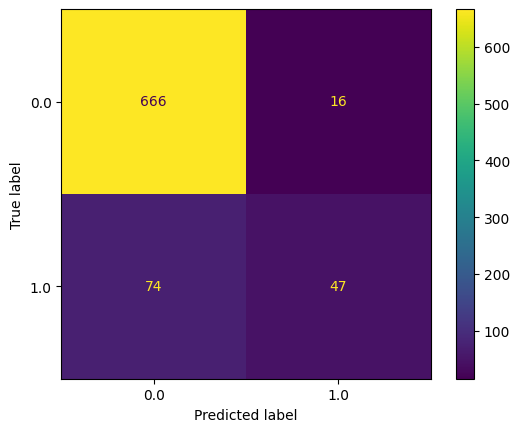

In [62]:
ensemble_disp.plot()

In [63]:
plt.close()

# Generate a detailed classification report for the ensemble model

In [64]:
print("\nEnsemble Learner Classification Report:")
print(classification_report(y_test_class, ensemble_predictions))


Ensemble Learner Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94       682
         1.0       0.75      0.39      0.51       121

    accuracy                           0.89       803
   macro avg       0.82      0.68      0.72       803
weighted avg       0.88      0.89      0.87       803



# Create a new figure for the ROC curve



<Figure size 800x600 with 0 Axes>

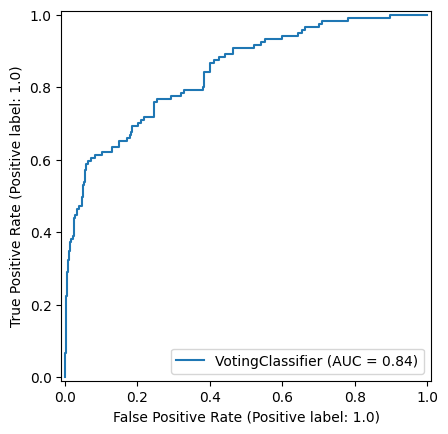

In [65]:
plt.figure(figsize=(8, 6))
ensemble_roc = RocCurveDisplay.from_estimator(ensemble_model, X_test_class, y_test_class)



# Print a summary comparing the performance of all models

In [66]:


print("\nModel Performance Comparison:")
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")
print(f"KNN Accuracy: {knn_accuracy:.4f}")
print(f"Ensemble Model Accuracy: {ensemble_accuracy:.4f}")



Model Performance Comparison:
Logistic Regression Accuracy: 0.9041
KNN Accuracy: 0.8842
Ensemble Model Accuracy: 0.8879


#Decision Tree Regression for Survival Months Prediction

In [71]:
import pandas as pd
import numpy as np
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics, tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [118]:
regression_data = pd.read_csv('/content/regression_data_prepared (10).csv')

In [119]:
print("Regression Dataset Preview:")
print(regression_data.head())

Regression Dataset Preview:
        Age   T_Stage   N_Stage  6th_Stage  Differentiated     Grade  \
0 -1.576710 -0.069295 -1.013313  -0.758594       -0.814545 -0.633052   
1  1.319957 -1.269088 -1.013313  -1.457239       -0.814545 -0.633052   
2  0.181981  1.130498  1.357604   1.337340       -0.814545 -0.633052   
3 -1.369805 -1.269088  1.357604   1.337340       -0.814545 -0.633052   
4  1.216505 -1.269088 -1.013313  -1.457239       -0.814545 -0.633052   

    A_Stage  Tumor_Size  Estrogen_Status  Progesterone_Status  \
0  0.239983   -0.260675          0.45780             0.701862   
1  0.239983   -1.156432          0.45780             0.701862   
2  0.239983    1.846987          0.45780             0.701862   
3  0.239983   -1.367198         -2.18436            -1.424781   
4  0.239983   -1.156432          0.45780             0.701862   

   Survival_Months  Node_Positivity_Ratio  
0               14              -1.147556  
1               64              -1.147556  
2               

In [120]:
print("\nRegression Dataset Information:")
regression_data.info()


Regression Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    606 non-null    float64
 1   T_Stage                606 non-null    float64
 2   N_Stage                606 non-null    float64
 3   6th_Stage              606 non-null    float64
 4   Differentiated         606 non-null    float64
 5   Grade                  606 non-null    float64
 6   A_Stage                606 non-null    float64
 7   Tumor_Size             606 non-null    float64
 8   Estrogen_Status        606 non-null    float64
 9   Progesterone_Status    606 non-null    float64
 10  Survival_Months        606 non-null    int64  
 11  Node_Positivity_Ratio  606 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 56.9 KB


# Define feature columns for the regression task

In [121]:
feature_cols = [
    'Age', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'Grade',
    'A_Stage', 'Tumor_Size', 'Estrogen_Status', 'Node_Positivity_Ratio','Progesterone_Status'
]

# Extract target variable and drop mortality status from features

In [122]:
y = regression_data['Survival_Months']
X = regression_data[feature_cols]


In [123]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# DT-1: FULLY GROWN DECISION TREE REGRESSOR


In [124]:
print("Building fully grown Decision Tree Regressor...")
regressor_full = DecisionTreeRegressor(random_state=42)
regressor_full.fit(X_train, y_train)

Building fully grown Decision Tree Regressor...


DecisionTreeRegressor(random_state=42)

In [125]:
# Make predictions on the test set
y_pred_full = regressor_full.predict(X_test)

In [126]:
# Display the full tree depth
print(f"The full Regression Decision Tree Levels: {regressor_full.tree_.max_depth}")

The full Regression Decision Tree Levels: 21


# DT-2: PRUNED DECISION TREE REGRESSOR (4 LEVELS)

In [127]:
print("\nBuilding pruned Decision Tree Regressor (max_depth=4)...")
regressor_pruned = DecisionTreeRegressor(max_depth=4, random_state=42)
regressor_pruned.fit(X_train, y_train)


Building pruned Decision Tree Regressor (max_depth=4)...


DecisionTreeRegressor(max_depth=4, random_state=42)

In [128]:
# Make predictions on the test set
y_pred_pruned = regressor_pruned.predict(X_test)

# VISUALIZE THE DECISION TREES

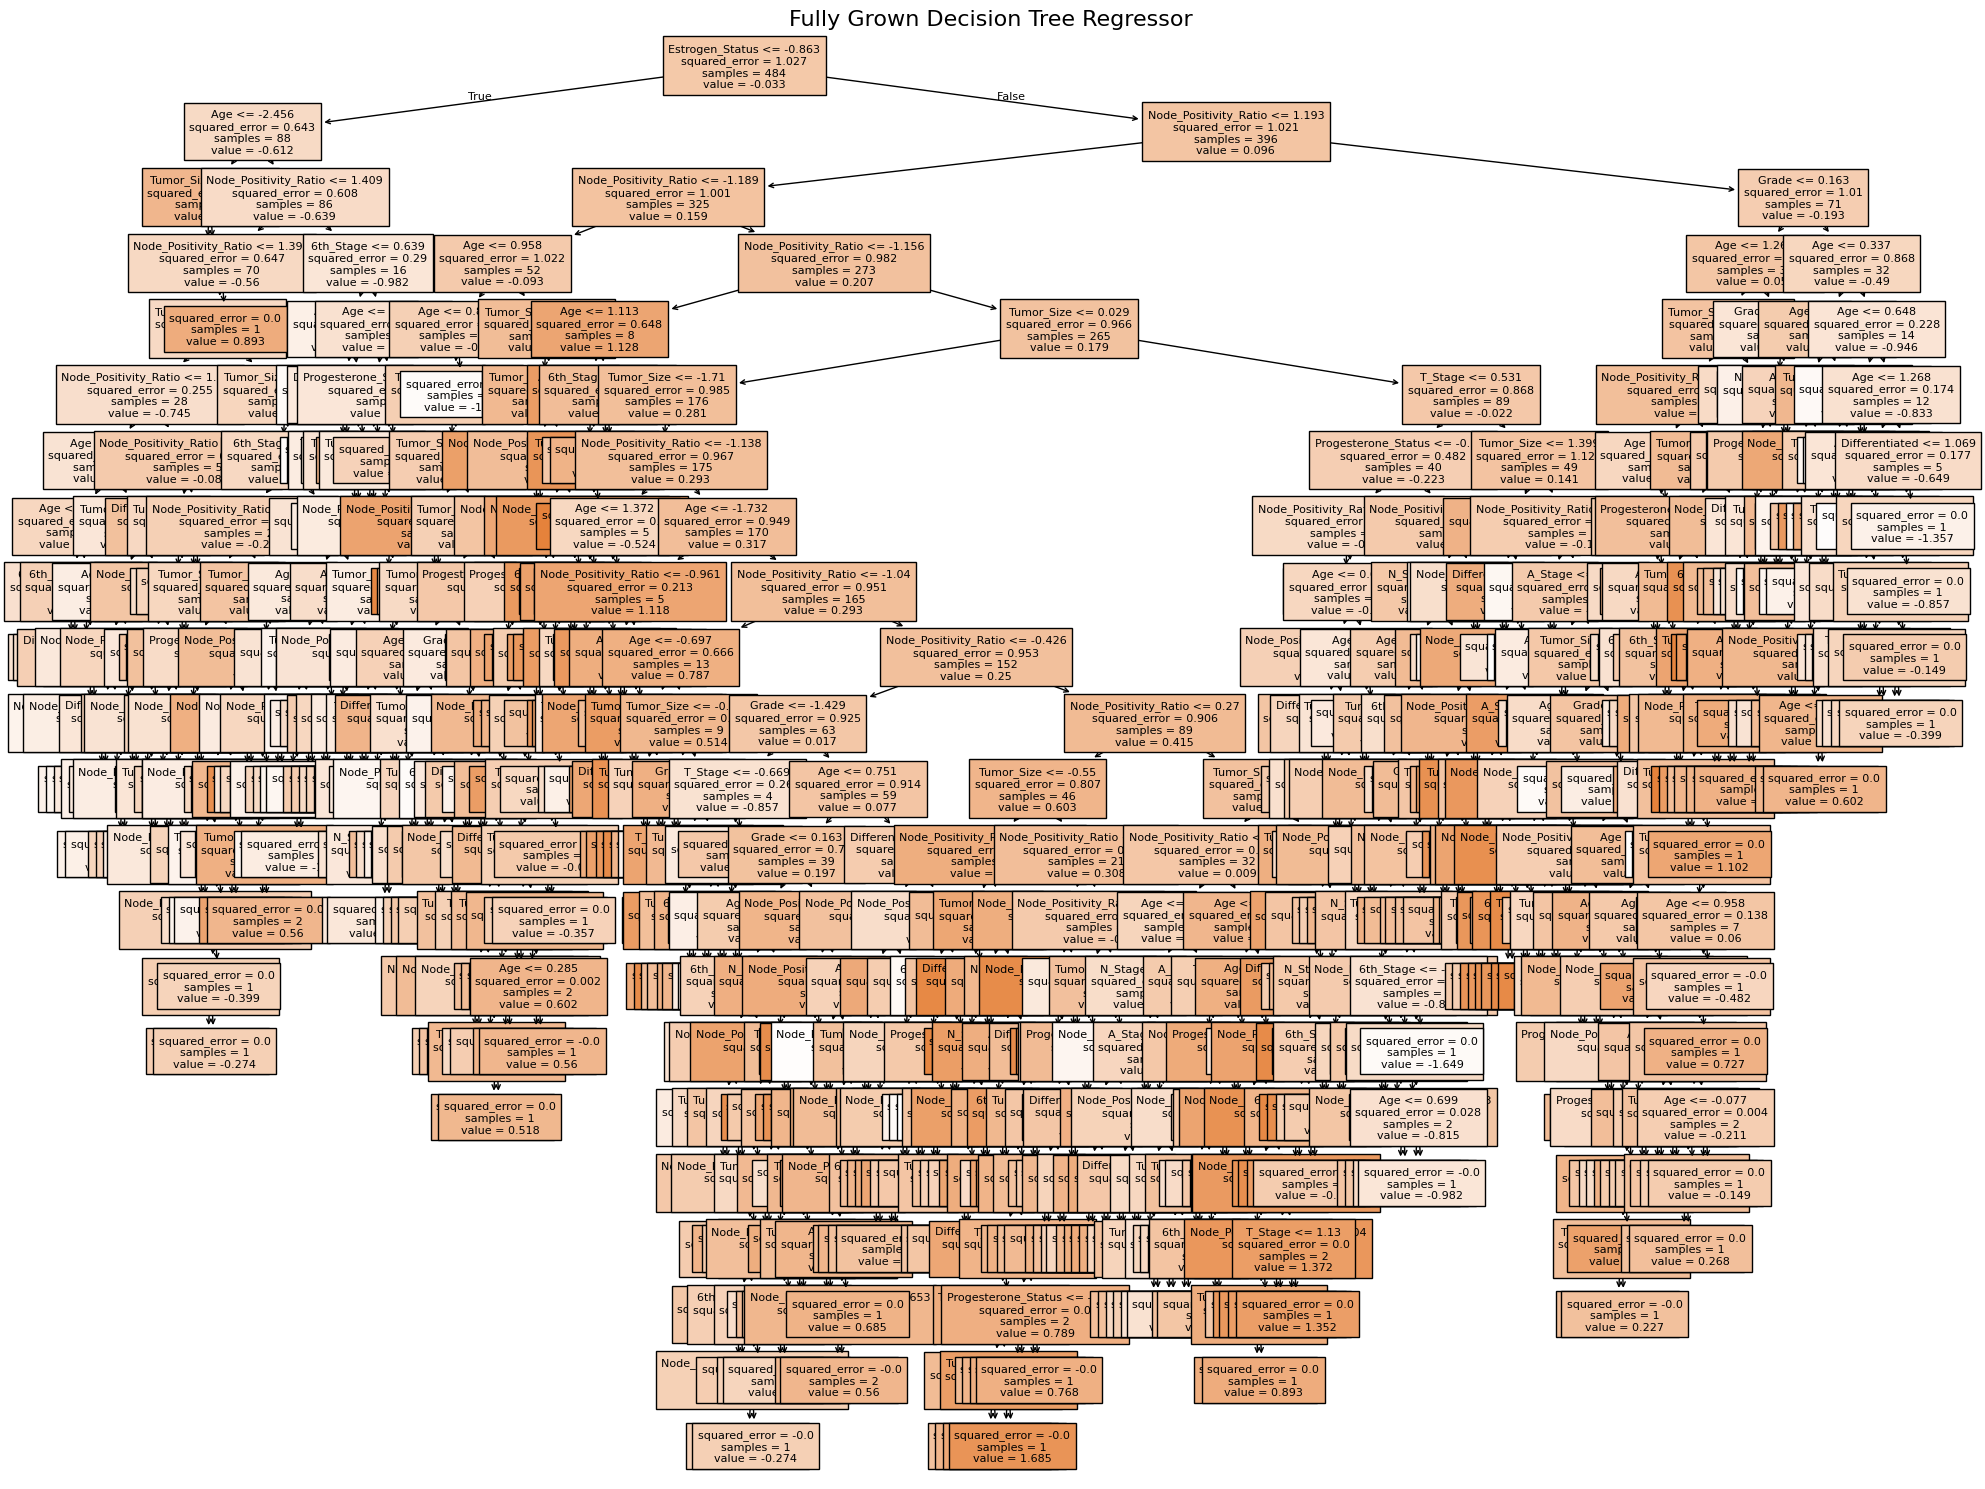

In [106]:
# Visualize the fully grown decision tree
plt.figure(figsize=(20, 15))
tree.plot_tree(regressor_full, feature_names=feature_cols, filled=True, fontsize=8)
plt.title("Fully Grown Decision Tree Regressor", fontsize=16)
plt.tight_layout()

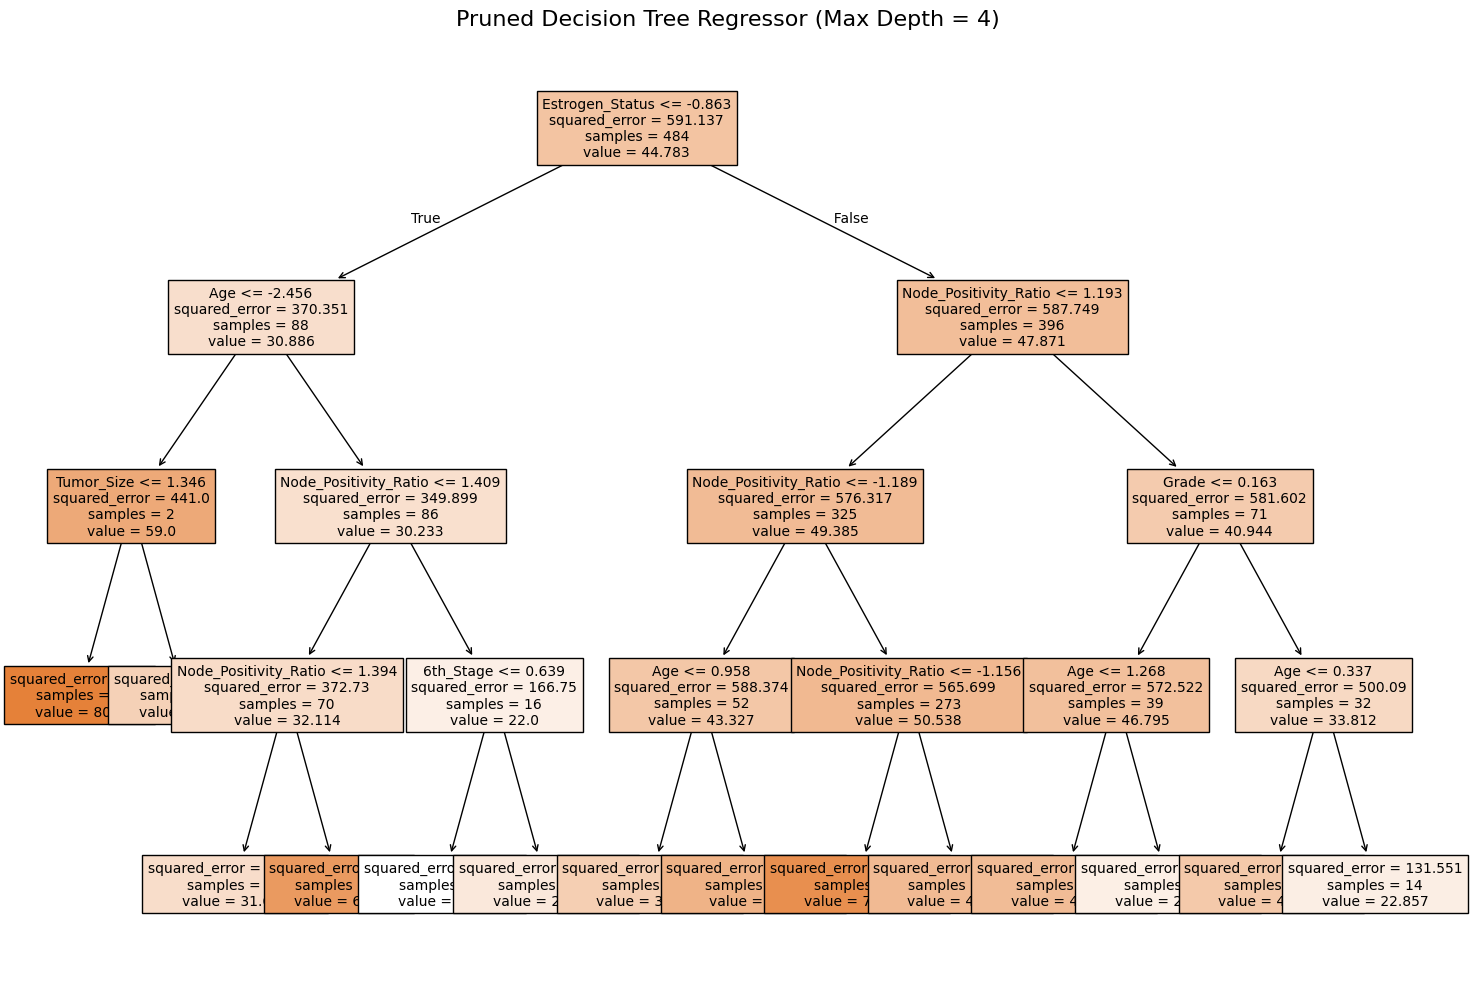

In [129]:
# Visualize the pruned decision tree
plt.figure(figsize=(15, 10))
tree.plot_tree(regressor_pruned, feature_names=feature_cols, filled=True, fontsize=10)
plt.title("Pruned Decision Tree Regressor (Max Depth = 4)", fontsize=16)
plt.tight_layout()

# EVALUATE THE MODELS

In [130]:
# Evaluate the performance of the fully grown model
print("\nFully Grown Decision Tree Performance:")
print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test, y_pred_full):.2f}")
print(f"Mean Squared Error: {metrics.mean_squared_error(y_test, y_pred_full):.2f}")
print(f"Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred_full)):.2f}")
print(f"R²: {metrics.r2_score(y_test, y_pred_full):.4f}")



Fully Grown Decision Tree Performance:
Mean Absolute Error: 27.41
Mean Squared Error: 1136.74
Root Mean Squared Error: 33.72
R²: -1.2590


In [131]:
# Evaluate the performance of the pruned model
print("\nPruned Decision Tree Performance:")
print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test, y_pred_pruned):.2f}")
print(f"Mean Squared Error: {metrics.mean_squared_error(y_test, y_pred_pruned):.2f}")
print(f"Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred_pruned)):.2f}")
print(f"R²: {metrics.r2_score(y_test, y_pred_pruned):.4f}")


Pruned Decision Tree Performance:
Mean Absolute Error: 18.54
Mean Squared Error: 592.11
Root Mean Squared Error: 24.33
R²: -0.1767


In [132]:
# Make predictions
y_train_pred = regressor_pruned.predict(X_train)
y_test_pred = regressor_pruned.predict(X_test)

# Calculate Mean Squared Error
from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Calculate R² score
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training MSE: {train_mse:.2f}")
print(f"Test MSE: {test_mse:.2f}")
print(f"Training R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")

Training MSE: 494.08
Test MSE: 592.11
Training R²: 0.1642
Test R²: -0.1767


# PREDICT FOR SPECIFIC PATIENT

In [136]:
# Create patient data with columns in the exact same order as used during training
patient_data_corrected = pd.DataFrame({
    'Age': [29],
    'T_Stage': [2],
    'N_Stage': [0],
    '6th_Stage': [4],
    'Differentiated': [0],
    'Grade': [2],
    'A_Stage': [1],
    'Tumor_Size': [41],
    'Estrogen_Status': [0],
    'Node_Positivity_Ratio': [1/5],
    'Progesterone_Status': [1]
})

# Verify that columns are in the exact same order as training data
print("Checking if patient data columns match training data:")
print(f"Patient data columns: {patient_data_corrected.columns.tolist()}")
print(f"Training data features: {feature_cols}")

# Ensure columns are in the exact same order as feature_cols
patient_data_ordered = patient_data_corrected[feature_cols]
print(f"Reordered patient data columns: {patient_data_ordered.columns.tolist()}")



Checking if patient data columns match training data:
Patient data columns: ['Age', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status', 'Node_Positivity_Ratio', 'Progesterone_Status']
Training data features: ['Age', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status', 'Node_Positivity_Ratio', 'Progesterone_Status']
Reordered patient data columns: ['Age', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status', 'Node_Positivity_Ratio', 'Progesterone_Status']


In [137]:
# Now predict survival months using both models
survival_months_full = regressor_full.predict(patient_data_ordered)
survival_months_pruned = regressor_pruned.predict(patient_data_ordered)

print("\nPredicted Survival Months for Patient:")
print(f"Using Full Decision Tree: {survival_months_full[0]:.2f} months")
print(f"Using Pruned Decision Tree: {survival_months_pruned[0]:.2f} months")


Predicted Survival Months for Patient:
Using Full Decision Tree: 16.00 months
Using Pruned Decision Tree: 49.87 months


Text(0, 0.5, 'Predicted Survival Months')

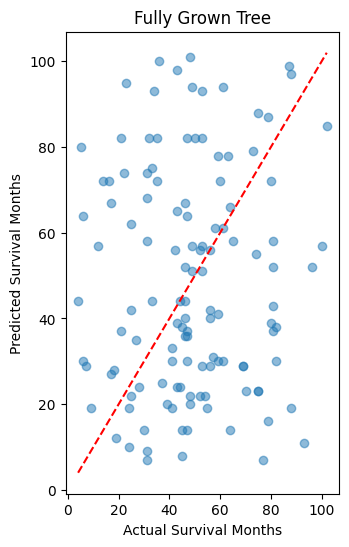

In [138]:
# Create a figure showing the prediction errors
plt.figure(figsize=(12, 6))

# Plot errors for fully grown tree
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_full, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Fully Grown Tree')
plt.xlabel('Actual Survival Months')
plt.ylabel('Predicted Survival Months')

Text(0, 0.5, 'Predicted Survival Months')

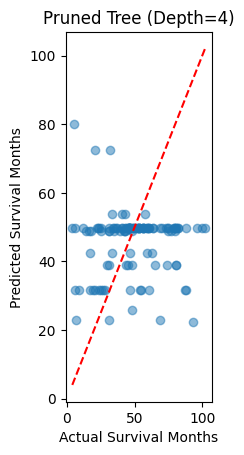

In [139]:
# Plot errors for pruned tree
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_pruned, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Pruned Tree (Depth=4)')
plt.xlabel('Actual Survival Months')
plt.ylabel('Predicted Survival Months')

In [140]:
# Feature importance analysis
plt.figure(figsize=(12, 8))
importance = regressor_pruned.feature_importances_
indices = np.argsort(importance)[::-1]
features = np.array(feature_cols)[indices]
plt.bar(range(len(importance)), importance[indices])
plt.xticks(range(len(importance)), features, rotation=90)
plt.title('Feature Importance for Survival Months Prediction')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.savefig("feature_importance.png", dpi=300)
plt.close()